In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import array_to_latex as a2l
import os
import pickle
np.set_printoptions(suppress = True)
# obs_series = np.genfromtxt('obs_series.csv', delimiter=',')
obs_series = pd.read_csv('data.csv', delimiter=',')
obs_series = np.array(obs_series.iloc[:,1:]).T

In [2]:
datadir = os.getcwd()
onlyfiles = [f for f in os.listdir(datadir) if (os.path.isfile(os.path.join(datadir, f)))&(f[-3:]=='pkl')]
file = []
for i in onlyfiles:
    with open(i, 'rb') as f:
        temp = pickle.load(f)
        file = file + temp
θs = []
for i in file:
    try:
        if np.isnan(i[0].fun) == False:
            θs.append(i[0])
    except:
        pass

In [3]:
fun = pd.DataFrame([i.fun for i in θs])
nit = pd.DataFrame([i.nit for i in θs])
success = pd.DataFrame([i.success for i in θs])
message = pd.DataFrame([i.message for i in θs])
λ = pd.DataFrame([i.x[0] for i in θs])
η = pd.DataFrame([i.x[1] for i in θs])
b11 = pd.DataFrame([i.x[2] for i in θs])
b22 = pd.DataFrame([i.x[3] for i in θs])
stable = pd.DataFrame([np.max(np.linalg.eig(np.array([i.x[4:7],i.x[8:11],i.x[12:15]]))[0])<1 for i in θs])
hess = pd.DataFrame([np.all(np.linalg.eigvals(i.hess_inv.todense()) >=0) for i in θs])

In [4]:
res = pd.concat([fun, nit, success, message, λ, η, b11, b22, stable, hess], axis = 1)
res.columns = ['ll','nit','success','message','λ','η','b11','b22','stable','hess']
res = res.loc[res['success']==True]
res = res.loc[res['stable']==True]
res = res.loc[res['hess']==True]
res.sort_values(by = 'll',ascending = True)

ll  nit  success  \
1020  -2167.219803  406     True   
790   -2164.203915  375     True   
1237  -2159.867040  399     True   
271    -690.362097  123     True   
311    -495.050373  136     True   
...            ...  ...      ...   
1145  26613.354939    1     True   
801   42890.891340    1     True   
273   43994.028059    3     True   
241   44156.675176    1     True   
802   54238.963272    1     True   

                                                message         λ         η  \
1020  b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.447157  0.002627   
790   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.524200  0.002224   
1237  b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.182437  0.003853   
271   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.004454  0.000816   
311   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.227838  0.003185   
...                                                 ...       ...       ...   
1145  b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.153644  2.743815   
801   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.210801 -2.100731   
273   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.000000  1.174064   
241   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.274759 -1.519348   
802   b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS...  0.054884 -0.636114   

           b11       b22  stable  hess  
1020 -0.000186  0.003970    True  True  
790  -0.003593 -0.003167    True  True  
1237 -0.000041  0.005023    True  True  
271  -1.143198 -0.608221    True  True  
311  -0.001811 -0.012198    True  True  
...        ...       ...     ...   ...  
1145  1.623766  1.738733    True  True  
801  -1.854243  3.485508    True  True  
273  -1.497682  1.472632    True  True  
241   2.246278 -4.135279    True  True  
802   0.014210  0.516117    True  True  

[436 rows x 10 columns]

In [61]:
θ = θs[1020].x

θ = np.array([ 0.81335461,  0.0008838 ,  0.00264882,  0.00205893, -0.06932197,
        0.03693947,  0.01914964,  0.14526841,  0.55429254,  0.96165619,
       -0.01372573, -0.10883824, -1.38159534,  0.05512141,  1.02297055,
        0.19312876, -0.00214002, -0.01663311,  0.02918606, -0.00637849,
        0.00084532,  0.03995731])
θ = np.array([ 0.77096756,  0.00108784,  0.00000639,  0.00240388,  0.18799262,
        0.03360472,  0.0172674 ,  0.12293973,  0.56276258,  0.9571477 ,
       -0.0154036 , -0.11810094, -1.36636394,  0.06413006,  1.0245882 ,
        0.20477673, -0.00291407, -0.01420238,  0.03048646, -0.00529517,
        0.00211661,  0.04023442])
θ = np.array([ 0.78551082,  0.00101908, -0.00001732,  0.00232475,  0.23225134,
        0.03323253,  0.01683406,  0.11843385,  0.58524044,  0.9548389 ,
       -0.0163681 , -0.12377525, -1.36063181,  0.06541425,  1.02481179,
        0.20500185, -0.00299703, -0.01416611,  0.03054636, -0.00524111,
        0.00217498,  0.04019188])

η, λ, b11, b22, Bs11, Bs21, Bs31, As14, Bs22, Bs32, As24, As34, Bs33, As11, As21, As31, As12, As22, As32, As13, As23, As33 =0.000996660645706002,0.787936017358697,0.00402591329042657,0.0017966610336503,1.3181561898462e-07,-0.0294789579497956,-0.0158863622772698,-0.00466172312601469,0.0130659673777097,-0.0352775532271587,0.607372544963266,0.596664883000289,3.31746358881826e-07,1.00106843767799,-0.329743327881358,-0.337890493598685,0.00288805827903624,1.01752366497545,0.0428641649353026,0.000738022437643496,-0.065224958211231,0.925763610330883
# η, λ, b11, b22, Bs11, Bs21, Bs31, As14, Bs22, Bs32, As24, As34, Bs33, As11, As21, As31, As12, As22, As32, As13, As23, As33 =\
# 0.000306035776019451,0.935609954695801,0.00131939188590408,0.000869213790253369,0.00409710916123683,0.0108212250850214,0.00134581274004778,0.211904073311165,0.0317725503839175,0.000996088868709153,1.03681373745934,3.03572772398832,0.0373013123515122,0.930608882894182,-0.321367948920251,-0.971339327544689,0.0147499590953759,1.0482168505822,0.187474844562292,-0.00649510613343986,-0.0424322547001591,0.882246818261194
η, λ, b11, b22, Bs11, Bs21, Bs31, As14, Bs22, Bs32, As24, As34, Bs33, As11, As21, As31, As12, As22, As32, As13, As23, As33 =\
0.000337806911619457,0.925611899966844,0.00426115633814111,0.000878388426081797,0.000855036659249236,0.0321824352445475,-0.00610225680170371,0.487472049225891,0.00840151161257446,0.0293385523196504,2.41068755174513,4.67585412904258,0.0244516390738668,0.715577036813766,-1.403555148606,-2.73167426063458,0.0279294444593202,1.11826912103711,0.269594820878606,-0.0015504105021487,-0.0134362575127877,0.977364145257339

η, λ, b11, b22, Bs11, Bs21, Bs31, As14, Bs22, Bs32, As24, As34, Bs33, As11, As21, As31, As12, As22, As32, As13, As23, As33 =\
0.000305490846638182,\
0.935762654740717,\
0.00127380252943099,\
0.000868115810321064,\
0.0041120612103662,\
0.0108126590160435,\
0.00137527444192848,\
0.124623137858823,\
0.0317777947324973,\
0.000987661915634757,\
0.589508880576824,\
1.75848709156144,\
0.0372986778572148,\
0.931437823559413,\
-0.318835369083619,\
-0.964454132673237,\
0.0146701405858222,\
1.04809015174125,\
0.187080844884679,\
-0.00647597279893236,\
-0.0425642238596372,\
0.881787728909007

θ = np.array([λ, η, \
              b11, b22, \
              As11, As12, As13, As14, \
              As21, As22, As23, As24, \
              As31, As32, As33, As34, \
              Bs11, Bs21, Bs22, Bs31, Bs32, Bs33])

In [62]:
def ll(θ):

    λ, η, b11, b22, As11, As12, As13, As14, As21, As22, As23, As24, As31, As32, As33, As34, Bs11, Bs21, Bs22, Bs31, Bs32, Bs33 = θ

    A = np.array([[1,   1,   0,     0,     0,     0],\
                [0,   λ,   0,     0,     0,     η],\
                [0,   0,   As11,  As12,  As13,  As14],\
                [0,   0,   As21,  As22,  As23,  As24],\
                [0,   0,   As31,  As32,  As33,  As34],\
                [0,   0,   0,     0,     0,     1]])
    B = np.array([[b11, 0,   0,     0,     0],\
                [0,   b22, 0,     0,     0],\
                [0,   0,   Bs11,  0,     0],\
                [0,   0,   Bs21,  Bs22,  0],\
                [0,   0,   Bs31,  Bs32,  Bs33],\
                [0,   0,   0,       0,   0]])
    D = np.array([[1,   1,   As11,  As12,  As13,  As14],\
                [1,   1,   As21,  As22,  As23,  As24],\
                [1,   1,   As31,  As32,  As33,  As34]])
    F = np.array([[b11, 0,   Bs11,  0,     0],\
                [b11, 0,   Bs21,  Bs22,  0],\
                [b11, 0,   Bs31,  Bs32,  Bs33]])

    μ0, Σ0, _, _ = init_kf(θ)

    _, _, ll = Kalman_Filter(obs_series, D, F, A, B, μ0, Σ0)

    return -ll[0][0]

def callback(x):
    fobj = ll(x)
    θseries.append(x)
    llseries.append(fobj)

In [63]:
def init_kf(θ):
    
    λ, η, b11, b22, As11, As12, As13, As14, As21, As22, As23, As24, As31, As32, As33, As34, Bs11, Bs21, Bs22, Bs31, Bs32, Bs33 = θ
    ones = np.ones([3,1])
    
    Ass = np.array([[As11, As12, As13],\
                    [As21, As22, As23],\
                    [As31, As32, As33]])
    Aso = np.array([[As14],\
                    [As24],\
                    [As34]])
    Bs =  np.array([[Bs11, 0,    0],\
                    [Bs21, Bs22, 0],\
                    [Bs31, Bs32, Bs33]])
    
    μs = sp.linalg.solve(np.eye(3) - Ass, Aso) 
    Σs = sp.linalg.solve_discrete_lyapunov(Ass, Bs@Bs.T)
    
    β = sp.linalg.solve(np.hstack([Σs@np.array([[1,1],[0,-1],[-1,0]]), ones]).T, np.array([[0,0,1]]).T)                                     
    γ1 = np.array([[1],[0],[0]]) - sp.linalg.inv(Σs)@ones/(ones.T@sp.linalg.inv(Σs)@ones)
    γ2 = np.array([[0],[1],[0]]) - sp.linalg.inv(Σs)@ones/(ones.T@sp.linalg.inv(Σs)@ones)
    γ3 = np.array([[0],[0],[1]]) - sp.linalg.inv(Σs)@ones/(ones.T@sp.linalg.inv(Σs)@ones)
    Γ = np.hstack([γ1, γ2, γ3])
    
    Z01 = β.T@(obs_series[:,[0]] - μs)
    Σz01 = 0
    Z02 = η/(1-λ)
    Σz02 = b22**2/(1-λ**2)
    S0 = Γ.T@(obs_series[:,[0]] - μs) + μs
    Σs0 = (1/(ones.T@np.linalg.inv(Σs)@ones))[0][0]
    
    μ0 = np.array([[Z01[0][0]],\
                   [Z02],\
                   [S0[0][0]],\
                   [S0[1][0]],\
                   [S0[2][0]],\
                   [1]])
    Σ0 = np.array([[Σz01,0,    0,   0,   0,   0],\
                   [0,   Σz02, 0,   0,   0,   0],\
                   [0,   0,    Σs0, Σs0, Σs0, 0],\
                   [0,   0,    Σs0, Σs0, Σs0, 0],\
                   [0,   0,    Σs0, Σs0, Σs0, 0],\
                   [0,   0,    0,   0,   0,   0]])    
    return μ0, Σ0, Ass, Σs

In [64]:
def Kalman_Filter(obs, D, F, A, B, μ0, Σ0):

    state_μ = np.zeros([A.shape[1], obs.shape[1]])
    state_μ[:,[0]] = μ0
    state_Σ = np.zeros([A.shape[1], A.shape[1], obs.shape[1]])
    state_Σ[:,:,0] = Σ0

    ll = 0

    for t in range(obs.shape[1]-1):
        μt = state_μ[:,[t]]
        Σt = state_Σ[:,:,t]
        KΣt = (A@Σt@D.T + B@F.T)@np.linalg.inv(D@Σt@D.T+F@F.T)
        state_μ[:,[t+1]] = A@μt + KΣt@(obs[:,[t+1]] - D@μt)
        state_Σ[:,:,t+1] = A@Σt@A.T + B@B.T - (A@Σt@D.T + B@F.T)@np.linalg.inv(D@Σt@D.T + F@F.T)@(D@Σt@A.T+F@B.T)

        Ω = D@Σt@D.T + F@F.T
        ll += (-0.5*obs_series.shape[0]*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(Ω)) \
               - 0.5*(obs[:,[t+1]] - D@μt).T@np.linalg.inv(Ω)@(obs[:,[t+1]] - D@μt))
    return state_μ, state_Σ ,ll

In [65]:
%%time
θseries = []
llseries = []
θ_opt = sp.optimize.minimize(ll, θ, method = 'L-BFGS-B', bounds = None, callback = callback, tol=1e-9) 

CPU times: user 3min 12s, sys: 484 ms, total: 3min 13s
Wall time: 3min 13s


In [67]:
θ_opt

      fun: -2200.4889661869443
 hess_inv: <22x22 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.12482815, -89.11051737,  -1.38879841, -12.13225005,
         9.55724313,   0.60545062,  -6.52207746,   4.57857823,
         0.05602487,   5.30794754,   1.76596586,  -0.36725396,
        -0.60649654,  -0.70685928,   1.36501512,  -0.17203092,
         8.01355782,   2.52516656,  -6.8063855 ,  -1.85223143,
        -1.17311174,   2.66622919])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 7636
      nit: 294
     njev: 332
   status: 0
  success: True
        x: array([ 0.92543379,  0.00036262,  0.00147342,  0.00093325,  0.93194123,
        0.01453103, -0.00644192,  0.12373645, -0.3187978 ,  1.04778299,
       -0.04270882,  0.58961856, -0.96430256,  0.18742774,  0.8822512 ,
        1.75849743,  0.00402237,  0.01075879,  0.03176089,  0.00126119,
        0.00101276,  0.03731377])

In [55]:
# λ, η, b11, b22, As11, As12, As13, As14, As21, As22, As23, As24, As31, As32, As33, As34, Bs11, Bs21, Bs22, Bs31, Bs32, Bs33 = θ

A = np.array([[1,   1,   0,     0,     0,     0],\
              [0,   λ,   0,     0,     0,     η],\
              [0,   0,   As11,  As12,  As13,  As14],\
              [0,   0,   As21,  As22,  As23,  As24],\
              [0,   0,   As31,  As32,  As33,  As34],\
              [0,   0,   0,     0,     0,     1]])
B = np.array([[b11, 0,   0,     0,     0],\
              [0,   b22, 0,     0,     0],\
              [0,   0,   Bs11,  0,     0],\
              [0,   0,   Bs21,  Bs22,  0],\
              [0,   0,   Bs31,  Bs32,  Bs33],\
              [0,   0,   0,       0,   0]])
D = np.array([[1,   1,   As11,  As12,  As13,  As14],\
              [1,   1,   As21,  As22,  As23,  As24],\
              [1,   1,   As31,  As32,  As33,  As34]])
F = np.array([[b11, 0,   Bs11,  0,     0],\
              [b11, 0,   Bs21,  Bs22,  0],\
              [b11, 0,   Bs31,  Bs32,  Bs33]])

Ass = np.array([[As11, As12, As13],\
                [As21, As22, As23],\
                [As31, As32, As33]])
Aso = np.array([[As14],\
                [As24],\
                [As34]])
Bs =  np.array([[Bs11, 0,    0],\
                [Bs21, Bs22, 0],\
                [Bs31, Bs32, Bs33]])
 
Azz = np.array([[1, 1],\
                [0, λ]])

Azo = np.array([[0],\
                [η]])

Bz = np.array([[b11, 0],\
               [0, b22]])

μ0, Σ0, _, _ = init_kf(θ)

μ_state, Σ_state, ll = Kalman_Filter(obs_series, D, F, A, B, μ0, Σ0)

In [68]:
Aso

array([[0.12462314],
       [0.58950888],
       [1.75848709]])

In [33]:
ll

array([[2200.43365708]])

In [34]:
μz_state = μ_state[0:2,:]
μs_state = μ_state[2:5,:]
D_sim = μz_state[0,:]+μs_state

In [35]:
μs = sp.linalg.solve(np.eye(3) - Ass, Aso) 
a2l.to_ltx(μs, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  1.9852\\
  0.6631\\
 -0.2712
\end{bmatrix}


In [36]:
np.linalg.eigvals(Ass)
a2l.to_ltx(np.linalg.eigvals(Ass), frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.9958 + 0.0000j &  0.9328 + 0.0207j &  0.9328 + -0.0207j
\end{bmatrix}


In [37]:
Σs = sp.linalg.solve_discrete_lyapunov(Ass, Bs@Bs.T)
a2l.to_ltx(Σs, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.0030 &  0.0099 & -0.0083\\
  0.0099 &  0.0515 & -0.0025\\
 -0.0083 & -0.0025 &  0.0705
\end{bmatrix}


In [38]:
np.linalg.eigvals(Σs)

array([0.00025182, 0.07216234, 0.05255831])

In [39]:
np.linalg.eigvals(Σs)
a2l.to_ltx(np.linalg.eigvals(Σs), frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.0003 &  0.0722 &  0.0526
\end{bmatrix}


In [19]:
Ass
a2l.to_ltx(Ass, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.9314 &  0.0147 & -0.0065\\
 -0.3188 &  1.0481 & -0.0426\\
 -0.9645 &  0.1871 &  0.8818
\end{bmatrix}


In [20]:
Aso
a2l.to_ltx(Aso, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.1246\\
  0.5895\\
  1.7585
\end{bmatrix}


In [21]:
Bs
a2l.to_ltx(Bs, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.0041 &  0.0000 &  0.0000\\
  0.0108 &  0.0318 &  0.0000\\
  0.0014 &  0.0010 &  0.0373
\end{bmatrix}


In [22]:
Azo
a2l.to_ltx(Azo, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.0000\\
  0.0003
\end{bmatrix}


In [23]:
Azz
a2l.to_ltx(Azz, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  1.0000 &  1.0000\\
  0.0000 &  0.9358
\end{bmatrix}


In [24]:
Bz 
a2l.to_ltx(Bz, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  0.0013 &  0.0000\\
  0.0000 &  0.0009
\end{bmatrix}


In [25]:
μ0
a2l.to_ltx(μ0, frmt = '{:6.4f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
  7.2660\\
  0.0048\\
  2.1845\\
  1.3911\\
 -0.8547\\
  1.0000
\end{bmatrix}


In [26]:
Σ0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.00000606, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00030616, 0.00030616, 0.00030616,
        0.        ],
       [0.        , 0.        , 0.00030616, 0.00030616, 0.00030616,
        0.        ],
       [0.        , 0.        , 0.00030616, 0.00030616, 0.00030616,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

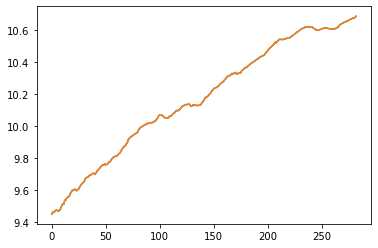

In [28]:
plt.plot(D_sim[0,:])
plt.plot(obs_series[0,:])

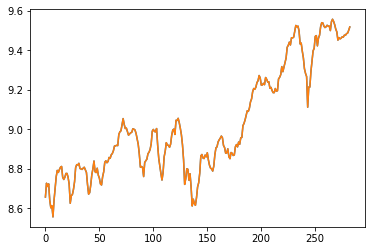

In [29]:
plt.plot(D_sim[1,:])
plt.plot(obs_series[1,:])

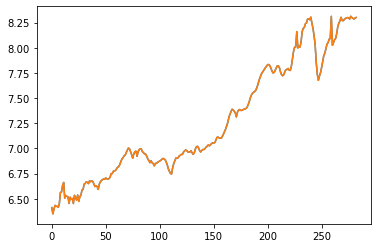

In [30]:
plt.plot(D_sim[2,:])
plt.plot(obs_series[2,:])